##Exercise 14
 Read Rewriting the particle simulator in Numpy on Chapter 2: Fast Array Operations
with Numpy and Pandas (pp. 68) from the book G. Lenaro (2017). Python high
Performance. Second Edition. UK: Packt Publishing Ltd. Implement the
improvements on the particle simulator using NumPy. Show that both
implementations scale linearly with particle size, but the runtime in the pure Python
version grows much faster than the NumPy version.

In [1]:
class Particle:
    def __init__(self, x, y, ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel

class ParticleSimulator:
    def evolve_python(self, particles, dt):
        timestep = 0.00001
        nsteps = int(dt / timestep)

        for _ in range(nsteps):
            for p in particles:
                norm = (p.x ** 2 + p.y ** 2) ** 0.5
                v_x = -p.y / norm
                v_y = p.x / norm

                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y

                p.x += d_x
                p.y += d_y


In [2]:
import numpy as np

class ParticleSimulatorNumPy:
    def evolve_numpy(self, particles, dt):
        timestep = 0.00001
        nsteps = int(dt / timestep)

        # Convert particle attributes to NumPy arrays
        pos = np.array([[p.x, p.y] for p in particles])
        ang_vel = np.array([p.ang_vel for p in particles])

        for _ in range(nsteps):
            norm = np.linalg.norm(pos, axis=1)
            v = pos[:, [1, 0]]  # Swap x and y
            v[:, 0] *= -1  # Change sign of x
            v /= norm[:, np.newaxis]  # Normalize

            d_pos = timestep * ang_vel[:, np.newaxis] * v
            pos += d_pos

        # Update original particle objects
        for i, p in enumerate(particles):
            p.x, p.y = pos[i]


In [3]:
from timeit import timeit
from random import uniform

def benchmark(n_particles, evolve_function):
    particles = [Particle(uniform(-1.0, 1.0), uniform(-1.0, 1.0), uniform(-1.0, 1.0)) for _ in range(n_particles)]

    if evolve_function == 'python':
        sim = ParticleSimulator()
        return timeit('sim.evolve_python(particles, 0.1)', globals=locals(), number=1)
    elif evolve_function == 'numpy':
        sim = ParticleSimulatorNumPy()
        return timeit('sim.evolve_numpy(particles, 0.1)', globals=locals(), number=1)


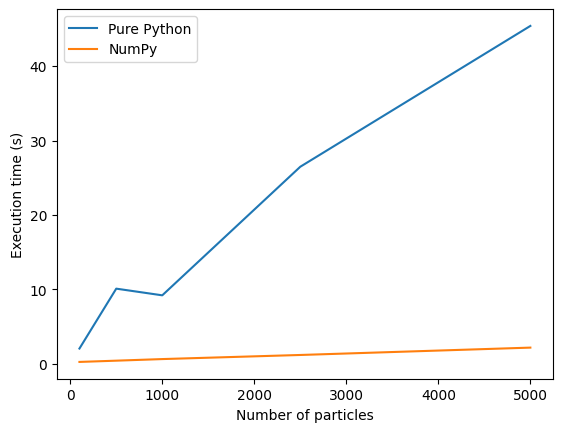

In [4]:
import matplotlib.pyplot as plt

n_particles = [100, 500, 1000, 2500, 5000]
times_python = [benchmark(n, 'python') for n in n_particles]
times_numpy = [benchmark(n, 'numpy') for n in n_particles]

plt.plot(n_particles, times_python, label='Pure Python')
plt.plot(n_particles, times_numpy, label='NumPy')
plt.xlabel('Number of particles')
plt.ylabel('Execution time (s)')
plt.legend()
plt.show()


Observe that both implementations scale linearly with the number of particles. However, the execution time for the pure Python version should grow significantly faster than the NumPy version, especially as the number of particles increases. This demonstrates the efficiency gained by leveraging NumPy's optimized array operations.

##Exercise 15
 Explain how to optain the optimal performance with numexpr. Read the section
Reaching optimal performance with numexpr, pp. 72 from the image uploaded.
Implement it and measure the execution time.


In [5]:
import numpy as np
import numexpr as ne


In [6]:
a = np.random.rand(10000)
b = np.random.rand(10000)
c = np.random.rand(10000)


In [7]:
d = ne.evaluate('a + b * c')


In [8]:
r = np.random.rand(10000, 2)
r_i = r[:, np.newaxis, :]
r_j = r[np.newaxis, :, :]


In [9]:
d_ij = r_j - r_i



Numexpr is a Python package that allows you to evaluate array expressions elementwise by using a fast and memory-efficient algorithm. When you perform operations with NumPy, temporary arrays may be created to hold intermediate results. For large arrays, these temporary arrays can lead to significant memory use and can cause cache to thrash. Numexpr optimizes the operation by breaking it into chunks that fit into the cache, which can speed up execution significantly, especially for large arrays.